In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/pizza_not_pizza/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/pizza_not_pizza/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/train/not_pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/test/not_pizza')))

855
855
128
128


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1368 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
43/43 [==============================] - 678s 16s/step - loss: 0.7270 - accuracy: 0.6279 - val_loss: 0.5686 - val_accuracy: 0.7047
Epoch 2/10
43/43 [==============================] - 7s 171ms/step - loss: 0.5453 - accuracy: 0.7215 - val_loss: 0.5267 - val_accuracy: 0.7427
Epoch 3/10
43/43 [==============================] - 7s 168ms/step - loss: 0.4709 - accuracy: 0.7880 - val_loss: 0.4671 - val_accuracy: 0.7836
Epoch 4/10
43/43 [==============================] - 7s 165ms/step - loss: 0.4062 - accuracy: 0.8209 - val_loss: 0.5262 - val_accuracy: 0.7515
Epoch 5/10
43/43 [==============================] - 7s 170ms/step - loss: 0.2991 - accuracy: 0.8721 - val_loss: 0.5511 - val_accuracy: 0.7456
Epoch 6/10
43/43 [==============================] - 7s 165ms/step - loss: 0.1788 - accuracy: 0.9313 - val_loss: 0.6099 - val_accuracy: 0.7368
Epoch 7/10
43/43 [==============================] - 7s 170ms/step - loss: 0.1223 - accuracy: 0.9554 - val_loss: 0.9325 - val_accuracy: 0.7105
Epoch 

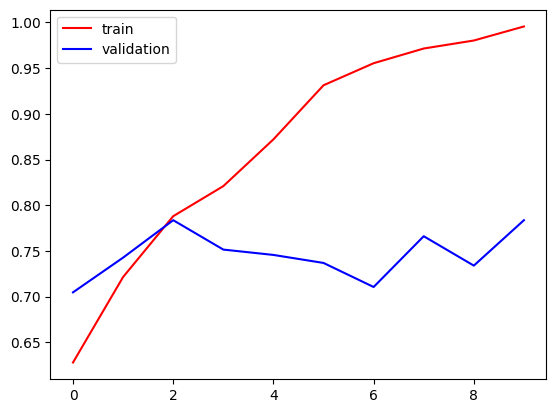

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

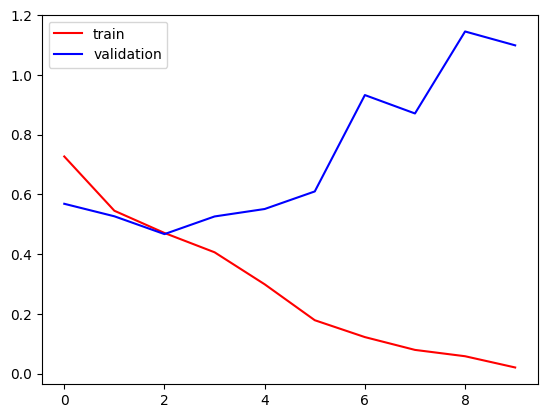

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

8/8 [==============================] - 85s 12s/step
[[4.94150847e-01]
 [1.25417374e-02]
 [9.99980450e-01]
 [3.07146297e-03]
 [7.23748375e-03]
 [8.79397616e-03]
 [9.28818226e-01]
 [7.45873213e-01]
 [9.99999881e-01]
 [9.99999881e-01]
 [8.47771585e-01]
 [4.86112229e-04]
 [9.97367442e-01]
 [9.56593454e-03]
 [8.96626115e-02]
 [7.17781067e-01]
 [9.23412800e-01]
 [1.38034415e-03]
 [4.25318144e-02]
 [9.20249283e-01]
 [1.32939629e-02]
 [3.80729645e-04]
 [3.62687260e-01]
 [4.28097770e-02]
 [9.99028325e-01]
 [2.99760629e-03]
 [5.55130720e-01]
 [9.96400118e-01]
 [8.83155270e-04]
 [6.48416504e-02]
 [9.99878407e-01]
 [9.63218272e-01]
 [8.48415971e-01]
 [2.55210489e-01]
 [9.99993443e-01]
 [1.48693181e-03]
 [7.97013100e-03]
 [8.02024454e-03]
 [9.93848383e-01]
 [5.66903114e-01]
 [1.97273940e-02]
 [2.47394055e-01]
 [1.89415948e-03]
 [1.40358938e-03]
 [9.70138371e-01]
 [7.93830514e-01]
 [3.76252644e-03]
 [7.88456872e-02]
 [8.43714084e-03]
 [9.26922619e-01]
 [1.04969167e-05]
 [9.99813378e-01]
 [9.99315381

In [13]:
len(predictions)

256

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[67 61]
 [71 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50       128
           1       0.48      0.45      0.46       128

    accuracy                           0.48       256
   macro avg       0.48      0.48      0.48       256
weighted avg       0.48      0.48      0.48       256

